<a href="https://colab.research.google.com/github/AMAN-GITHUB11/Quality-Assessment-Analytics/blob/main/Copy_of_Stats_Assembly_Line_Analytics_stats_mod_3_PW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

## Import the dataset

In [ ]:
import re

def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1VZofUrdzEQdMXRg6UK8fttpvfRVuEBxx0Gvg4BCbIEo/edit?usp=drive_link'

new_url = convert_google_sheet_url(url)

In [ ]:
df = pd.read_csv(new_url)

In [ ]:
df.head()

,ProductId,Defect,Assembly Line
0,P116731,0,2
1,P435720,1,1
2,P113177,0,2
3,P488442,0,1
4,P188067,0,2


#### Q1. Check number of rows and columns

In [ ]:
df.shape

(200, 3)

#### Q2. How many variables are numericals vs categorical?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductId      200 non-null    object
 1   Defect         200 non-null    int64 
 2   Assembly Line  200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


## Observations

#### Q3. Are there any inconsistencies withi the data? For instance, nulls, duplicates, outliers or garbage values

In [ ]:
#null
df.isnull().sum()

ProductId        0
Defect           0
Assembly Line    0
dtype: int64

In [ ]:
#duplicated
df.duplicated().sum()

0

In [ ]:
#inconsistency
df.describe()

,Defect,Assembly Line
count,200.000000,200.000000
mean,0.080000,1.975000
std,0.271974,0.798475
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,1.000000,3.000000


## Observations

#### Q4. Perform univariate analysis on the variables

In [ ]:
df['Defect'].value_counts()

0    184
1     16
Name: Defect, dtype: int64

In [ ]:
df['Defect'].value_counts(normalize=True)

0    0.92
1    0.08
Name: Defect, dtype: float64

<Axes: >

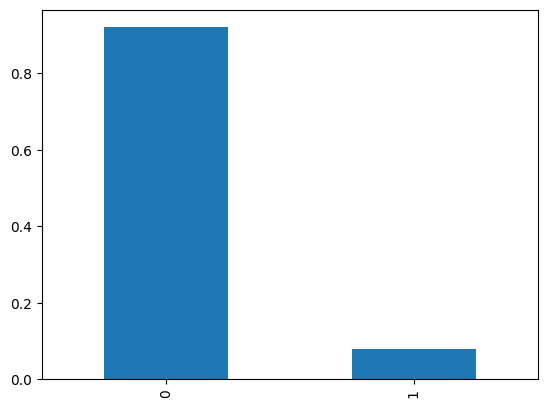

In [ ]:
#plot the distribution
df['Defect'].value_counts(normalize=True).plot(kind='bar')

<Axes: >

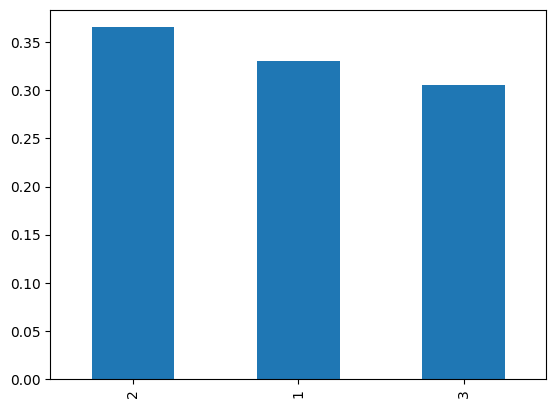

In [ ]:
#plot the distribution
df['Assembly Line'].value_counts(normalize=True).plot(kind='bar')

## Observations

#### Q5. Perform bivariate analysis on the variables

In [ ]:
df.corr()

<ipython-input-92-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Defect,Assembly Line
Defect,1.000000,0.055535
Assembly Line,0.055535,1.000000


<Axes: xlabel='Defect', ylabel='Assembly Line'>

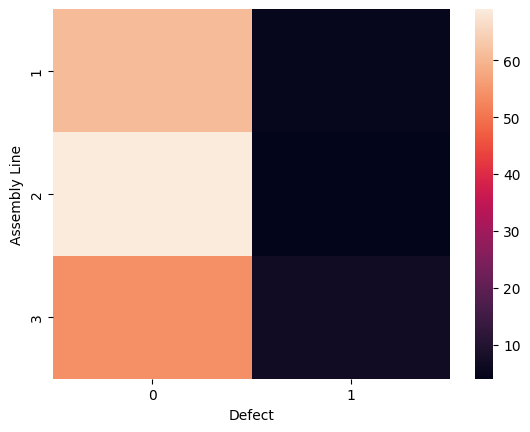

In [ ]:
sns.heatmap(pd.crosstab(index=df['Assembly Line'],columns=df.Defect))

#### Q6. Determine the probabilities for defects in individual assemble lines and plot it using visualization.

In [ ]:
temp = df.groupby('Assembly Line').agg({'Defect':['sum','count']}).reset_index()
temp.columns = ['Assembly Line','Total Defect','Total Observations']

In [ ]:
temp

,Assembly Line,Total Defect,Total Observations
0,1,5,66
1,2,4,73
2,3,7,61


In [ ]:
temp['Percentage'] = temp['Total Defect']/temp['Total Observations']
temp

,Assembly Line,Total Defect,Total Observations,Percentage
0,1,5,66,0.075758
1,2,4,73,0.054795
2,3,7,61,0.114754


## Observations

#### Q7. With the calculated probabilities, let's try to answer following questions for 20 samples drawn at random from different assembly lines.

#### 7.1. Check out the binomial distributions of probabilities from 0 to 20 defects from 20 samples drawn at random from 3 different assembly lines


In [ ]:
p1 = 0.075758
p2 = 0.054795
p3 = 0.114754

n = 20

k = np.arange(0,21)

In [ ]:
b1 = stats.binom.pmf(k,n,p1)
b1

array([2.06877854e-01, 3.39146078e-01, 2.64090759e-01, 1.29881488e-01,
       4.52458745e-02, 1.18678423e-02, 2.43194963e-03, 3.98682682e-04,
       5.31035479e-05, 5.80370160e-06, 5.23287741e-07, 3.89933615e-08,
       2.39714740e-09, 1.20916112e-10, 4.95560840e-12, 1.62479949e-13,
       4.16190914e-15, 8.02687437e-17, 1.09657418e-18, 9.46143939e-21,
       3.87766259e-23])

<Axes: >

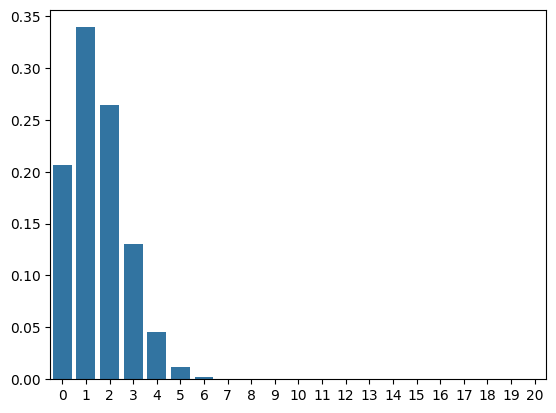

In [ ]:
sns.barplot(x = k, y = b1)

In [ ]:
b2 = stats.binom.pmf(k,n,p2)
b2

array([3.23981496e-01, 3.75634197e-01, 2.06872922e-01, 7.19564652e-02,
       1.77285686e-02, 3.28880838e-03, 4.76643309e-04, 5.52635039e-05,
       5.20603044e-06, 4.02402213e-07, 2.56606685e-08, 1.35235342e-09,
       5.87985190e-11, 2.09762545e-12, 6.08013004e-14, 1.40989828e-15,
       2.55418719e-17, 3.48400455e-19, 3.36621914e-21, 2.05415731e-23,
       5.95413429e-26])

<Axes: >

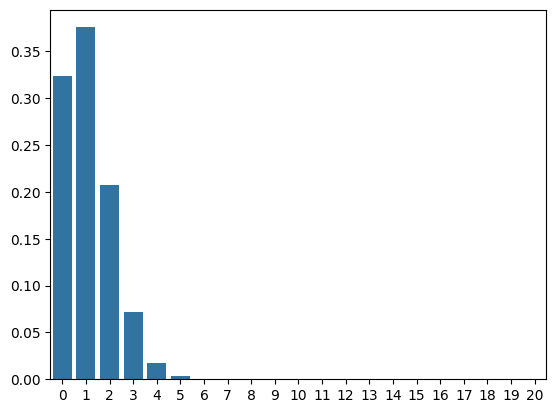

In [ ]:
sns.barplot(x = k,y = b2)

In [ ]:
b3 = stats.binom.pmf(k,n,p3)
b3

array([8.73533292e-02, 2.26471375e-01, 2.78895034e-01, 2.16918150e-01,
       1.19505717e-01, 4.95726938e-02, 1.60652093e-02, 4.16505023e-03,
       8.77359268e-04, 1.51642196e-04, 2.16230329e-05, 2.54816639e-06,
       2.47738160e-07, 1.97625691e-08, 1.28090602e-09, 6.64172847e-11,
       2.69051240e-12, 8.20634795e-14, 1.77297469e-15, 2.41926137e-17,
       1.56803826e-19])

<Axes: >

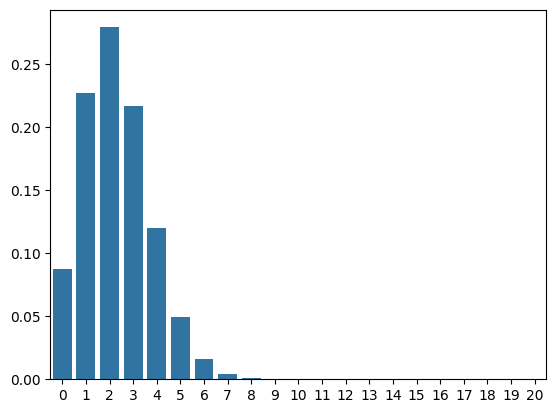

In [ ]:
sns.barplot(x =k,y = b3)

## Observations:

#### 7.2. What is the probability that two or fewer of the LED bulbs are defective for assembly line 1?

In [ ]:
stats.binom.cdf(2,n,p1)

0.8101146907434262

**7.3. What is the probability that at least 3 of the LED bulbs are defective for assembly line 1?**

In [ ]:
1-stats.binom.cdf(2,n,p1)

0.18988530925657376

#### 7.4 Which number of success witness the highest chances of occurrence in assembly line 3?

In [ ]:
np.argmax(b3)

2